# Auswertung des Versuchs 256 zur Röntgenfluoreszenz

### Pythonmodule

In [1]:
#Importieren von allen benötigten Modulen

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chi2
import io
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = 16, 9

### Analyse der $K_\alpha$-Strahlung

#### Eingabe der Messdaten

In [2]:
#Kernladungszahl
Z1=np.array([22,26,28,29,30,42,47])

#K_alpha in der Reihenfolge (Ti,Fe,Ni,Cu,Zn,Mo,Ag) in keV
K_alpha=np.array([4.89,6.40,7.33,7.96,8.53,17.51,21.97])

#Peakbreite
K_alpha_err=np.array([0.18,0.01,0.28,0.27,0.28,0.19,0.20])

#Wurzel aus K_alpha
sqrt_K_alpha=np.sqrt(K_alpha) 
sqrt_K_alpha_err=1/(2*np.sqrt(K_alpha))*K_alpha_err

#### Fit der Messdaten

In [3]:
#Fitfunktion und optimale Parameter

n1=1
n2=2

def fit_function(x, sqrt_Er, sig12):
    return sqrt_Er*(x-sig12)*np.sqrt(1/n1**2-1/n2**2)

popt1,pcov1=curve_fit(fit_function, Z1, sqrt_K_alpha, sigma=sqrt_K_alpha_err )

#### Plot der Messdaten

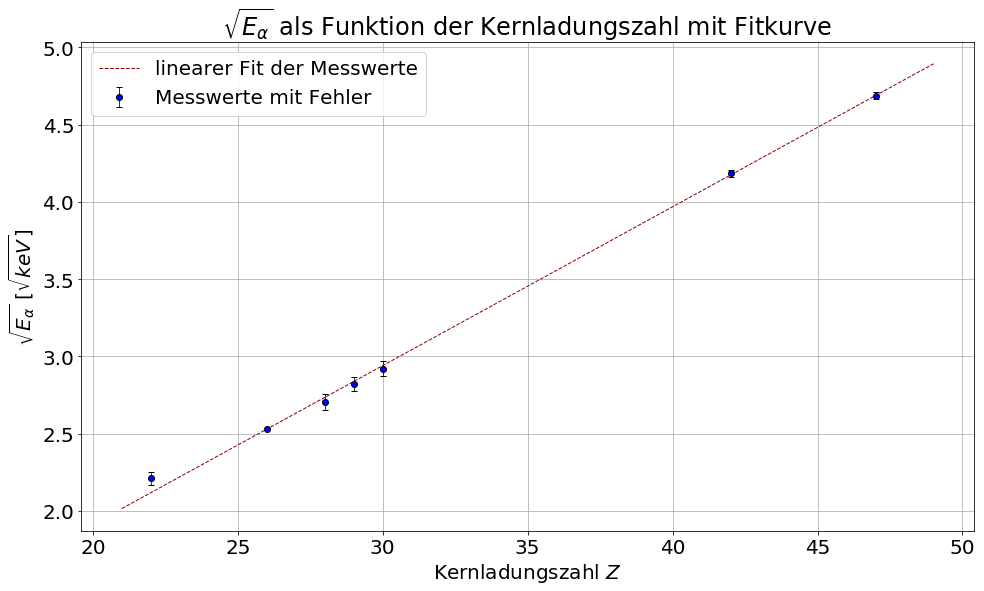

In [4]:
plt.errorbar(Z1, sqrt_K_alpha, yerr=sqrt_K_alpha_err, marker='o',markerfacecolor='blue',
             linewidth=0.8,linestyle='',capsize=3,color='black',label='Messwerte mit Fehler')
plt.plot(np.linspace(21,49,100),fit_function(np.linspace(21,49,100),*popt1),
         linewidth=1,linestyle='--',color='darkred',label='linearer Fit der Messwerte')
plt.xlabel(r'Kernladungszahl $ Z$')
plt.ylabel(r'$\sqrt{E_\alpha} $ [$ \sqrt{keV}$]')
plt.title(r'$\sqrt{E_\alpha}$ als Funktion der Kernladungszahl mit Fitkurve')
plt.grid(True)
plt.legend(loc='best')
plt.show()

#### Güte des Fits 

In [5]:
chi_squared1=np.sum((fit_function(Z1,*popt1)-sqrt_K_alpha)**2/sqrt_K_alpha_err**2)

#Freiheitsgrade
dof1=len(Z1)-2

chi_squared1_red=chi_squared1/dof1

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared1))
print('chi_squared_red= ' + str(chi_squared1_red))
print()

#Fitwahrscheinlichkeit
prob1=round(1-chi2.cdf(chi_squared1,dof1),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob1) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 5.9703343292397975
chi_squared_red= 1.1940668658479594

Die Fitwahrscheinlichkeit beträgt: 31.0 %


#### Ausgabe der Fitparameter

In [6]:
print('Aus dem Fit der Messwerte erhalten wir:')
print('sqrt_E = ' + str(popt1[0]) + ' ± ' + str(pcov1[0,0]**0.5) + ' [sqrt(keV)]')
print('delta12 = (' + str(popt1[1]) + ' ± ' + str(pcov1[1,1]**0.5))

Aus dem Fit der Messwerte erhalten wir:
sqrt_E = 0.11864451770737822 ± 0.0010428120855072247 [sqrt(keV)]
delta12 = (1.3768288692788462 ± 0.22004139135930037


\begin{align*}
    \sqrt{E} &= 0.119 \pm 0.001 \  \text{[keV} ^\frac{1}{2} \text{]}\\
    \delta_{12} &= 1.377 \pm 0.220
\end{align*}

#### Bestimmung der Rydbergenergie $E_R$

In [7]:
E_R_alpha=popt1[0]**2*1e3
E_R_alpha_err=2*popt1[0]*pcov1[0,0]**0.5*1e3

print('Wir erhalten für die Rydberg-Energie in eV:')
print('E_R = ' + str(E_R_alpha) + ' ± ' + str(E_R_alpha_err) + ' [eV]' )

Wir erhalten für die Rydberg-Energie in eV:
E_R = 14.076521582016383 ± 0.24744787388885986 [eV]


\begin{align*}
    E_R &= 14.077 \pm 0.248 \  \text{[keV]}
\end{align*}

#### Vergleich mit Literaturwerten

In [8]:
#Aus Wikipedia: 
sigma12_lit1=1.0

#Rydberg-Konstante
E_R_lit=13.605693005 #eV
E_R_lit_err=0.000000084 #eV

diff_sigma1=np.abs(sigma12_lit1-popt1[1])

diff_E_R1=np.abs(E_R_lit-E_R_alpha)
diff_E_R1_err=np.sqrt((E_R_lit_err)**2+E_R_alpha_err**2)

print('Der Vergleich mit den Literaturwerten liefert:')
print('∆delta12_1 = ' + str(diff_sigma1) + ' ± ' + str(pcov1[1,1]**0.5) +
      ' \nsigma = ' + str(diff_sigma1/pcov1[1,1]**0.5))
print('∆E_R1 = ' + str(diff_E_R1) + ' ± ' + str(diff_E_R1_err) +
      ' [eV] \nsigma = ' + str(diff_E_R1/diff_E_R1_err))

Der Vergleich mit den Literaturwerten liefert:
∆delta12_1 = 0.3768288692788462 ± 0.22004139135930037 
sigma = 1.712536295789601
∆E_R1 = 0.47082857701638403 ± 0.24744787388887413 [eV] 
sigma = 1.9027384217001901


\begin{align*}
    \delta_{12} &= 1.377 \pm 0.220 \\
    \delta_{12}^{lit} &= 1.8\\
    &\Rightarrow 1.71 \sigma \ \text{Abweichung}
\end{align*}

\begin{align*}
    E_R &= 14.077 \pm 0.248 \  \text{[keV]}\\
    E_R^{lit} &= 13.605693(84) \  \text{[keV]}\\
    &\Rightarrow 1.90 \sigma \ \text{Abweichung}
\end{align*}

### Analyse der $K_\beta$-Strahlung

In [9]:
#K_beta in der Reihenfolge (Ti,Fe,Ni,Cu,Zn,Mo,Ag) in keV
Z2=np.array([30,42,47])
K_beta=np.array([9.29,19.58,24.59])
#Peakbreite
K_beta_err=np.array([0.5,0.21,0.19])

#Wurzel aus K_alpha
sqrt_K_beta=np.sqrt(K_beta)
sqrt_K_beta_err=1/(2*np.sqrt(K_beta))*K_beta_err

#### Plot und Fit der Messdaten

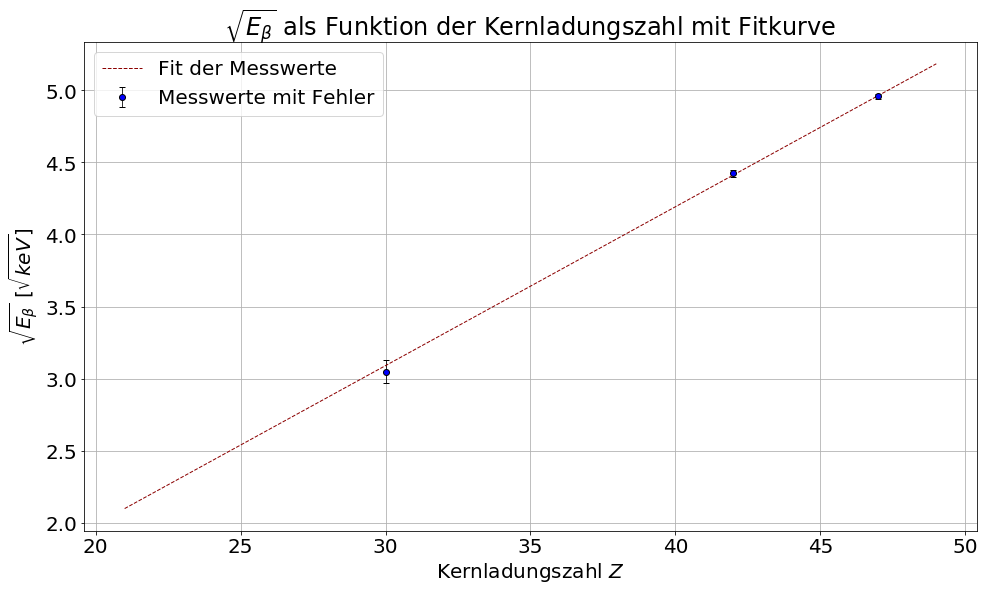

In [10]:
#Fit der Daten
n2=3
popt2,pcov2=curve_fit(fit_function, Z2, sqrt_K_beta, sigma=sqrt_K_beta_err)

plt.errorbar(Z2, sqrt_K_beta, yerr=sqrt_K_beta_err, marker='o',markerfacecolor='blue',
             linewidth=0.8,linestyle='',capsize=3,color='black',label='Messwerte mit Fehler')
plt.plot(np.linspace(21,49,100),fit_function(np.linspace(21,49,100),*popt2),
         linewidth=1,linestyle='--',color='darkred',label='Fit der Messwerte')
plt.xlabel(r'Kernladungszahl $ Z$')
plt.ylabel(r'$\sqrt{E_\beta}$ [$\sqrt{keV}$]')
plt.title(r'$\sqrt{E_\beta}$ als Funktion der Kernladungszahl mit Fitkurve')
plt.grid(True)
plt.legend(loc='best')
plt.show()

#### Güte des Fits

In [11]:
chi_squared2=np.sum((fit_function(Z2,*popt2)-sqrt_K_beta)**2/sqrt_K_beta_err**2)

#Freiheitsgrade
dof2=len(Z2)-2

chi_squared2_red=chi_squared2/dof2

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared2))
print('chi_squared_red= ' + str(chi_squared2_red))
print()

#Fitwahrscheinlichkeit
prob2=round(1-chi2.cdf(chi_squared2,dof2),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob2) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 0.595571600648207
chi_squared_red= 0.595571600648207

Die Fitwahrscheinlichkeit beträgt: 44.0 %


#### Ausgabe der Fitparameter

In [12]:
print('Aus dem Fit der Messwerte erhalten wir:')
print('sqrt_E = ' + str(popt2[0]) + ' ± ' + str(pcov2[0,0]**0.5) + ' [sqrt(keV)]')
print('delta12 = ' + str(popt2[1]) + ' ± ' + str(pcov2[1,1]**0.5))

Aus dem Fit der Messwerte erhalten wir:
sqrt_E = 0.11695101075774447 ± 0.0033593718012861406 [sqrt(keV)]
delta12 = 1.9772732048913264 ± 1.227086683784408


\begin{align*}
    \sqrt{E} &= 0.117 \pm 0.003 \  \text{[keV} ^\frac{1}{2} \text{]}\\
    \delta_{12} &= 1.977 \pm 1.227
\end{align*}

#### Bestimmung der Rydbergenergie $E_R$

In [13]:
E_R_beta=popt2[0]**2*1e3
E_R_beta_err=2*popt2[0]*pcov2[0,0]**0.5*1e3

print('Wir erhalten für die Rydberg-Energie in eV:')
print('E_R = ' + str(E_R_beta) + ' ± ' + str(E_R_beta_err) + ' [eV]' )

Wir erhalten für die Rydberg-Energie in eV:
E_R = 13.677538917258063 ± 0.7857638553429577 [eV]


\begin{align}
    E_R &= 13.678 \pm 0.786 \  \text{[keV]}
\end{align}

#### Vergleich mit Literaturwerten

In [14]:
#Aus Wikipedia: 
sigma12_lit2=1.8

diff_sigma2=np.abs(sigma12_lit1-popt2[1])

diff_E_R2=np.abs(E_R_lit-E_R_beta)
diff_E_R2_err=np.sqrt((E_R_lit_err)**2+E_R_beta_err**2)

print('Der Vergleich mit den Literaturwerten liefert:')
print('∆delta12_2 = ' + str(diff_sigma2) + ' ± ' + str(pcov1[1,1]**0.5) +
      ' \nsigma = ' + str(diff_sigma2/pcov1[1,1]**0.5))
print('∆E_R1 = ' + str(diff_E_R2) + ' ± ' + str(diff_E_R2_err) +
      ' [eV] \nsigma = ' + str(diff_E_R2/diff_E_R2_err))

Der Vergleich mit den Literaturwerten liefert:
∆delta12_2 = 0.9772732048913264 ± 0.22004139135930037 
sigma = 4.441315330966801
∆E_R1 = 0.07184591225806436 ± 0.7857638553429622 [eV] 
sigma = 0.09143448348957943


\begin{align*}
    \delta_{12} &= 1.977 \pm 1.227 \\
    \delta_{12}^{lit} &= 1.8\\
    &\Rightarrow 4.44 \sigma \ \text{Abweichung}
\end{align*}

\begin{align*}
    E_R &= 13.678 \pm 0.786 \  \text{[keV]}\\
    E_R^{lit} &= 13.605693(84) \  \text{[keV]}\\
    &\Rightarrow 0.09 \sigma \ \text{Abweichung}
\end{align*}